# Tutorial on `slr`, the Sea Level Rise Python Package

## Purpose
This simple tutorial is meant to cover 90% of cases where simple Sea Level Rise (SLR) figures are needed for engineering applications.

## Assumptions
This tutorial assumes that you were able to install the package, either directly from git or from the cloned repo on your local disk.

## Settings

In [1]:
import slr
import matplotlib.pyplot as plt
from importlib import reload
reload(slr)

<module 'slr' from 'c:\\users\\jnot\\git\\02 applications\\slr\\src\\slr\\__init__.py'>

## Display All Available Locations
Here we want to display all locations where SLR information is available.

In [2]:
slr.ALL_LOCATIONS

['San Francisco, CA', 'Los Angeles, CA', 'Crescent City, CA', 'San Diego, CA']

## Load a Local ScenarioPack
Let's assume we'd like to work with a project site located next to San Francisco, CA. Let's load all available information for that location using the following command:

In [4]:
sd = slr.ScenarioPack.from_location_or_key(
    location_or_key='San Diego, CA'
)

The projections can easily be loaded and displayed in a familiar format:

In [5]:
sd.dataframe

,"Low Risk, 83.00% [ft]","Medium Risk, 99.50% [ft]","Extreme Risk, nan% [ft]"
Year (baseline: 2000),,,
2030,0.6,0.9,1.1
2040,0.9,1.3,1.8
2050,1.2,2.0,2.8
2060,1.6,2.7,3.9
2070,2.0,3.6,5.2
2080,2.5,4.6,6.7
2090,3.0,5.7,8.3
2100,3.6,7.0,10.2
2110,3.7,7.5,12.0


It is possible that depending on project requirements or client preferences, specific units be desired. For that, the `.convert` method can be invoked:

In [8]:
sd.convert(to_units='m')

,"Low Risk, 83.00% [m]","Medium Risk, 99.50% [m]","Extreme Risk, nan% [m]"
Year (baseline: 2000),,,
2030,0.182871,0.274307,0.335264
2040,0.274307,0.396221,0.548613
2050,0.365742,0.609570,0.853398
2060,0.487656,0.822920,1.188662
2070,0.609570,1.097226,1.584883
2080,0.761963,1.402012,2.042060
2090,0.914355,1.737275,2.529717
2100,1.097226,2.133496,3.108808
2110,1.127705,2.285888,3.657422


<AxesSubplot:title={'center':'SLR for San Diego, CA'}, ylabel='SLR [m]'>

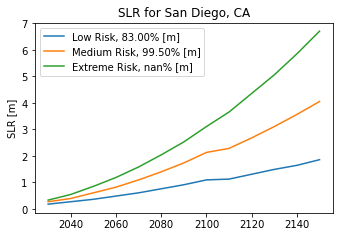

In [9]:
sd.plot()

<AxesSubplot:title={'center':'SLR for San Diego, CA'}, ylabel='SLR [m]'>

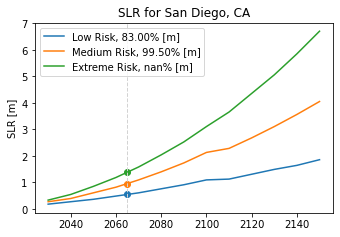

In [10]:
sd.plot(horizon_year=2065)

In [11]:
sd.by_horizon_year(horizon_year=2045, merge=True)

,"Low Risk, 83.00% [m]","Medium Risk, 99.50% [m]","Extreme Risk, nan% [m]"
Year (baseline: 2000),,,
2030,0.182871,0.274307,0.335264
2040,0.274307,0.396221,0.548613
2045,0.320024,0.502895,0.701006
2050,0.365742,0.609570,0.853398
2060,0.487656,0.822920,1.188662
2070,0.609570,1.097226,1.584883
2080,0.761963,1.402012,2.042060
2090,0.914355,1.737275,2.529717
2100,1.097226,2.133496,3.108808


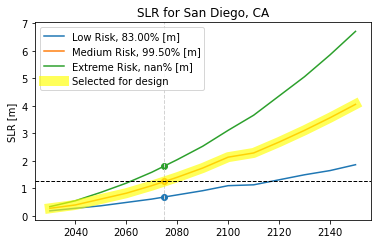

In [12]:
# Display a base figure using the builtin method
ax = sd.plot(horizon_year=2075)
# Highlight the specific Scenario item retained for design
ax.plot(sd[1].data.x, sd[1].data.y, c='yellow', label='Selected for design', lw=10, alpha=.65)
# Use the builtin class method to estimate SLR by the horizon year
ax.axhline(y=sd[1].by_horizon_year(horizon_year=2075), c='k', ls='--', lw=1)
# Update the legend
plt.legend()
plt.tight_layout()